In [18]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from pandas.plotting import _converter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tips = pd.read_csv('datasets/sna/tips.txt', header = None,delimiter="\t",encoding='ISO-8859-1')
tips.columns = ['user_id', 'venue_id','tip']
checkins = pd.read_csv('datasets/sna/checkins.txt', header = None,delimiter="\t")
checkins.columns = ['user_id', 'venue_id']
checkins['rating'] = pd.Series(0)
tags = pd.read_csv('datasets/sna/tags.txt', header = None,delimiter="\t",encoding='ISO-8859-1')
tags.columns = ['venue_id', 'tags']
tips.head()

,user_id,venue_id,tip
0,24436,15,make your own sandwich: tuna salad on country ...
1,8550,20,The calamari as an appetizer and the quail. Pr...
2,1537,20,Be careful with the napkins on your pants. The...
3,59283,20,"try the steak frites, it's the best - believe me"
4,713,20,go visit google across the street. see the big...


In [19]:
def weighted_score(x):
    para = x['tip']
    sentense = word_tokenize(para)
    word_features = []

    for i,j in nltk.pos_tag(sentense):
        if j in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']:
            word_features.append(i)

    rating = 0

    for i in word_features:
        #print(i)
        with open('datasets/sna/pwords.txt', 'rt') as f:
            for row in f.readlines():
                reader = row.split('\t')
                if i==reader[0]:
                    #print(i, reader[1])
                    rating = rating + int(reader[1])
    if rating > 5 : 
        rating = 5
    elif rating < -5 :
        rating = -5
    return rating

In [20]:
tips1 = tips.head(3000)
tips1.head()

,user_id,venue_id,tip
0,24436,15,make your own sandwich: tuna salad on country ...
1,8550,20,The calamari as an appetizer and the quail. Pr...
2,1537,20,Be careful with the napkins on your pants. The...
3,59283,20,"try the steak frites, it's the best - believe me"
4,713,20,go visit google across the street. see the big...


In [21]:
tips1['score'] = tips1.apply(weighted_score,axis=1)
tips1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,venue_id,tip,score
0,24436,15,make your own sandwich: tuna salad on country ...,0
1,8550,20,The calamari as an appetizer and the quail. Pr...,5
2,1537,20,Be careful with the napkins on your pants. The...,2
3,59283,20,"try the steak frites, it's the best - believe me",3
4,713,20,go visit google across the street. see the big...,1
5,40518,20,Great drinks & good appetizers. Love the desse...,3
6,33560,20,Try the English breakfast,0
7,17435,20,total madhouse and that's because the french o...,0
8,59010,20,And by the way if u are looking for a Job on a...,0
9,59010,20,Go for the grattin dauphinois!,0


In [22]:
tips3 = tips1[['venue_id','score']].groupby('score').count()
tips3.columns = ['number of users']
tips3

,number of users
score,
-5,1
-4,1
-3,21
-2,43
-1,20
0,1790
1,91
2,134
3,507


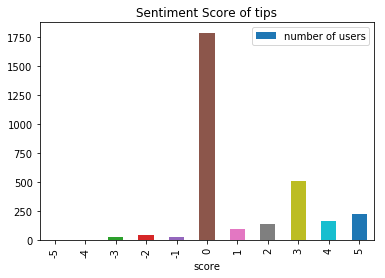

In [23]:
tips3.plot(y='number of users',kind='bar',title='Sentiment Score of tips',legend='True')

In [69]:
tags.head(5)

,venue_id,tags
0,15,
1,20,"andy cohen,bakery,bar,barbeque,bbq,bistro,bout..."
2,25,"colombian,cupcake,fish tacos,grilled corn,long..."
3,26,"brunch,happy hour,irish,pub"
4,36,"french,soho,zagat-rated,zagats"


In [70]:

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
tfidf

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [71]:
tags['tags'] = tags['tags'].fillna('')
tags.head(5)

,venue_id,tags
0,15,
1,20,"andy cohen,bakery,bar,barbeque,bbq,bistro,bout..."
2,25,"colombian,cupcake,fish tacos,grilled corn,long..."
3,26,"brunch,happy hour,irish,pub"
4,36,"french,soho,zagat-rated,zagats"


In [72]:
tfidf_matrix = tfidf.fit_transform(tags['tags'].values.astype('U'))
tfidf_matrix

<3298x3220 sparse matrix of type '<type 'numpy.float64'>'
	with 18172 stored elements in Compressed Sparse Row format>

In [73]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [76]:
tfidf_matrix = tfidf_matrix.todense()
type(tfidf_matrix)

numpy.matrixlib.defmatrix.matrix

In [81]:
features = pd.DataFrame(tfidf.get_feature_names())
features

,0
0,10
1,11
2,1127
3,1241a
4,1668
5,1701
6,1940
7,195
8,1963
9,1991


In [82]:
features.loc[features[0] == 'andy']

,0
110,andy


In [94]:
df = pd.DataFrame(tfidf_matrix)
df

,0,1,2,3,4,5,6,7,8,9,...,3210,3211,3212,3213,3214,3215,3216,3217,3218,3219
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
andyKeLiye = pd.DataFrame(df.iloc[1])
andyKeLiye.iloc[110]

1    0.144723
Name: 110, dtype: float64

In [97]:
df1 = pd.DataFrame(df[1])
df1

SyntaxError: invalid syntax (<ipython-input-97-4d8a454ed246>, line 1)

In [96]:
df1.iloc[109]

1    0.0
Name: 109, dtype: float64

In [28]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.04265406, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04265406, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [29]:
indices = pd.Series(tags.index, index=tags['venue_id'])

In [30]:

def get_recommendations(venue, cosine_sim=cosine_sim):
    # Get the index of the venue that matches the title
    idx = indices[venue]
    
    # Get the pairwsie similarity scores of all venue with that venue
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the venues based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar venues
    sim_scores = sim_scores[1:11]

    # Get the venue indices
    venue_indices = [i[0] for i in sim_scores]

    # Return the top 1-0 most similar venues
    return tags['venue_id'].iloc[venue_indices]

In [31]:

def get_recommendations1(venue, cosine_sim=cosine_sim):
    # Get the index of the venue that matches the title
    idx = indices[venue]

    # Get the pairwsie similarity scores of all venue with that venue
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the venues based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar venues
    sim_scores = sim_scores[1:11]
    
    # Get the venue indices
    venue_indices = [(tags['venue_id'].iloc[i[0]],i[1]) for i in sim_scores]

    # Return the top 1-0 most similar venues
    return venue_indices

In [32]:
get_recommendations1(20)

[(170936, 0.31948748125263154),
 (81766, 0.26680464815357413),
 (11173, 0.2640022692612974),
 (76405, 0.26222029923643464),
 (1143, 0.24516171593438138),
 (15590, 0.24496103043450307),
 (20001, 0.23557645431887148),
 (4733, 0.2339364866342967),
 (46, 0.23303117974879445),
 (15024, 0.22681479176676528)]

In [33]:
checkins = checkins.groupby(['user_id','venue_id']).size().reset_index(name='count')
checkins.head()

,user_id,venue_id,count
0,6,278,2
1,15,910,1
2,15,1070,1
3,15,1254,2
4,15,1329,1


In [34]:
checkins = checkins.sort_values(['user_id','count'],ascending=False)
checkins.head()

,user_id,venue_id,count
13468,266712,4889,2
13470,266712,9953,2
13469,266712,8228,1
13471,266712,10969,1
13465,266576,10289,1


In [35]:
def get_recommendations_by_userId(userId):
    VenueIds = checkins.loc[checkins['user_id'] == userId]
    venues = pd.Series(VenueIds['venue_id'])
    sug = []
    sug2 = []
    for i in venues :
        hug = get_recommendations1(i)
        for j in hug : 
            sug.append(j)
            
    sug = sorted(sug, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar venues
    sug1 = sug[1:11]
    for i in sug1 :
        sug2.append(i[0])
    return sug2

In [36]:
get_recommendations_by_userId(266576)

[21029, 14924, 24124, 31443, 84770, 3219, 6158, 6700, 11806, 12799]